# 作业2 股票数据清洗

同学们好，本次作业的主要内容为使用pandas进行数据预处理。希望这两天你们已经从Python的课程内容中回过神来了。
没有数据的分析是无源之水，能够熟练处理数据是成为合格的数据分析师的基本要求，希望大家在今后多多实战，成为数据大师。

本次作业将使用公开标普500的股票数据。
https://www.kaggle.com/dgawlik/nyse#prices-split-adjusted.csv

作业的形式以问答为主，因为不涉及过长的代码，核心是数据的操作，所以这里没有太多的代码模板可供大家参考。
希望大家能从搜索引擎（google/bing）问答社区（stackoverflow）或者[官方文档](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)或者我提供的jupyter notebooks 中找到回答问题需要的方法。
请时刻牢记数据的增删改查四种原子操作，思考我们的问题可以被如何分解。

那么首先，我们要import pandas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# 1. 从fundamentals.csv开始！

fundamentals.csv 是这些股票的年报数据

请用数据回答以下问题：

1. S&P500股票在2015年`net income`的均值是多少？最大值比最小值多多少？（每问10分，共计20分）
2. S&P500股票在2016年的固定资产（fixed assets）占总资产(total assets)比例的均值是多少？固定资产占总资产比例最小的股票是的代码（ticker symbol）是什么？（每问10分，共计20分）


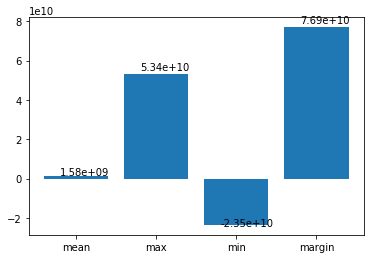

In [101]:
# 1. S&P500股票在2015年net income的均值是多少？最大值比最小值多多少？
fundamentals_df = pd.read_csv('fundamentals.csv')
# fundamentals_df.head()
# fundamentals_df.shape # (1781, 79) 

# 计算2015年net income的均值、最大值、最小值
netincome_mean = fundamentals_df.query('`For Year` == 2015.0')['Net Income'].mean()
netincome_max = fundamentals_df.query('`For Year` == 2015.0')['Net Income'].max()
netincome_min = fundamentals_df.query('`For Year` == 2015.0')['Net Income'].min()
netincom_margin = netincome_max - netincome_min

# 构建 DataFrame 用于画图
netincome_res = np.array([netincome_mean,netincome_max,netincome_min,netincom_margin])
netincome_index = ['mean','max','min','margin']
netincome_df = pd.DataFrame(data=netincome_res,index=netincome_index)
# netincome_df.head()

#定义函数来显示柱状上的数值
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.-0.2, 1.03*height, '%.2e' % float(height))
        
# 画图
# netincome_df.plot(kind='bar', title='Net Income of S&P500-2015', color='blue')
netincome_bar = plt.bar([0,1,2,3],netincome_res,tick_label=netincome_index)
autolabel(netincome_bar)

In [102]:
# 2.S&P500股票在2016年的固定资产（fixed assets）占总资产(total assets)比例的均值是多少？
#   固定资产占总资产比例最小的股票是的代码（ticker symbol）是什么？
fundamentals_df = pd.read_csv('fundamentals.csv')

# 提取固定资产和总资产
fixed_assets = fundamentals_df.query('`For Year` == 2016.0')['Fixed Assets']
total_assets = fundamentals_df.query('`For Year` == 2016.0')['Total Assets']
# 计算比例
fixed_ratios = fixed_assets / total_assets
# 计算均值
ratios_avg = fixed_ratios.mean() 
print('S&P500股票在2016年的固定资产占总资产比例的均值是:{:.2%}'.format(ratios_avg))

# 计算比例最小的索引
# print(fixed_ratios.min())
min_idx = fixed_ratios.idxmin()
# print(fixed_ratios[min_idx])
# min_row = fundamentals_df.loc[min_idx] 
# print(min_row['Fixed Assets']/min_row['Total Assets'])

# 根据索引获取股票代码
min_ticker = fundamentals_df.loc[min_idx,'Ticker Symbol']
print('S&P500股票在2016年的固定资产占总资产比例最小的股票代码是：{}'.format(min_ticker))

S&P500股票在2016年的固定资产占总资产比例的均值是:18.56%
S&P500股票在2016年的固定资产占总资产比例最小的股票代码是：DHI


# 2. 加入securities.csv~

securities.csv包含了这些股票的基本信息

1. 请列举出各个sector中的加入时间最早的股票名称（10分）
2. 请列举出每一个州中加入时间最晚的股票名称（10分）


In [85]:
# 1.请列举出各个sector中的加入时间最早的股票名称
securities_df = pd.read_csv('securities.csv')
# securities_df.head()
# sorted_df = securities_df.sort_index(axis=0, ascending=True,by=['GICS Sector','Date first added'])

# 查询股票代码和加入时间，去掉 NaN
sector_sort = securities_df[['Ticker symbol','Date first added']].dropna(how='any')
# 分组计算最小值
sector_early = sector_sort.groupby(securities_df['GICS Sector']).min()
# sector_early.head()

# 保留股票代码
sector_early_ts = sector_early['Ticker symbol']
print('各个sector中的加入时间最早的股票名称：')
print(sector_early_ts)

各个sector中的加入时间最早的股票名称：
GICS Sector
Consumer Discretionary          AAP
Consumer Staples                ADM
Energy                          COG
Financials                      AIG
Health Care                    ABBV
Industrials                     AAL
Information Technology         AAPL
Materials                       ALB
Real Estate                     AMT
Telecommunications Services    LVLT
Utilities                       AEE
Name: Ticker symbol, dtype: object


In [106]:
# 2. 请列举出每一个州中加入时间最晚的股票名称 'Address of Headquarters'
securities_df = pd.read_csv('securities.csv')
# securities_df.head(n=20)

# 提取州名，替换地域列值
securities_df['Address of Headquarters'] = securities_df['Address of Headquarters'].apply(lambda obj: obj.split(',')[1])
# securities_df.head(n=20)

# 查询股票代码和加入时间，去掉 NaN
state_sort = securities_df[['Ticker symbol','Date first added']].dropna(how='any')
# 分组计算最大值
state_late = state_sort.groupby(securities_df['Address of Headquarters']).max()
# sector_late.head()

# 保留股票代码
state_late_ts = state_late['Ticker symbol']
print('各个州中加入时间最晚的股票名称：')
print(state_late_ts)
# print(state_late_ts.shape)

各个州中加入时间最晚的股票名称：
Address of Headquarters
 Arizona                        RSG
 Arkansas                       WMT
 Bermuda                        SIG
 California                     WFC
 Colorado                       XEC
 Connecticut                    URI
 Delaware                      NAVI
 Florida                        ROP
 Georgia                        TSS
 Idaho                           MU
 Illinois                       WBA
 Indiana                        LLY
 Ireland                        STX
 Kent                          DLPH
 Kentucky                       YUM
 Kingdom of the Netherlands     SLB
 Louisiana                      ALB
 Maine                         IDXX
 Maryland                       UAA
 Massachusetts                 VRTX
 Michigan                       MAS
 Minnesota                      UNH
 Missouri                      ORLY
 NY                            COTY
 Nebraska                       CAG
 Netherlands                    LYB
 Nevada                

# 3. merge!

现在你需要同时处理来自两个表中的信息了

1. 请思考，合并两个表的信息的时候，我们应该用什么样的准则对其它们（10分）
    - 使用一列或多列作为连接键
        - 列值全相同的行合并，列名不同的根据连接类型增加新列
        - 列值不等的行作为2行，原表无列名的填充默认值/空值
    - 使用一行或多行作为连接键
        - 索引全相同的行合并，列名不同的根据连接类型增加新列
        - 索引不等的作为2行，原表无列名的填充默认值/空值
2. 请列举每个sector在2013-2016年累计Research&Development的总投入（10分）
3. 请列举出每个sector中，在2013-2016年累计Research&development投入最大的3家公司的名称以及投入的数值（20分）

In [237]:
# 2. 请列举每个sector在2013-2016年累计Research&Development的总投入
fundamentals_df = pd.read_csv('fundamentals.csv')
securities_df = pd.read_csv('securities.csv')

# 查询每支股票在 2013-2016 年的研发总投入 
ts_rd = fundamentals_df.query('`For Year` >=2013.0 and `For Year` <= 2016.0').loc[:,['Ticker Symbol','Research and Development']]
table1 = ts_rd.groupby(['Ticker Symbol']).sum()
# 查询股票的行业和公司名称
table2 = securities_df.loc[:,['Ticker symbol','GICS Sector','Security' ]]
# 修改列名
table2.rename(columns={'Ticker symbol':'Ticker Symbol'}, inplace = True)
# 表合并
t_merge = pd.merge(table1,table2,on='Ticker Symbol',how='left')
# 分组计算每个sector的研发总投入
sector_total = t_merge['Research and Development'].groupby(t_merge['GICS Sector']).sum()

print('每个sector在2013-2016年累计Research&Development的总投入：')
# print(sector_total.shape)
print(sector_total)

# 3. 请列举出每个sector中，在2013-2016年累计Research&development投入最大的3家公司的名称以及投入的数值
# 按sector将研发投入排序
rd_sort = t_merge.sort_values(axis=0, ascending=False,by=['GICS Sector','Research and Development'])
# rd_sort.query('`GICS Sector` == "Health Care"') 
# 按sector分组取前3
rd_group_sort= rd_sort.loc[:,['GICS Sector','Security','Research and Development']].groupby(['GICS Sector']).head(3)
print('\n\n每个sector中，在2013-2016年累计Research&development投入最大的3家公司的名称以及投入的数值：')
# print(rd_group_sort.shape)
rd_group_sort.head(n=33)

每个sector在2013-2016年累计Research&Development的总投入：
GICS Sector
Consumer Discretionary         1.860178e+09
Consumer Staples               1.346700e+09
Energy                         1.692513e+09
Financials                     0.000000e+00
Health Care                    1.527224e+11
Industrials                    4.262290e+10
Information Technology         2.818233e+11
Materials                      1.850921e+10
Real Estate                    1.162100e+08
Telecommunications Services    0.000000e+00
Utilities                      0.000000e+00
Name: Research and Development, dtype: float64


每个sector中，在2013-2016年累计Research&development投入最大的3家公司的名称以及投入的数值：


,GICS Sector,Security,Research and Development
11,Utilities,Ameren Corp,0.000000e+00
12,Utilities,American Electric Power,0.000000e+00
42,Utilities,American Water Works Company Inc,0.000000e+00
100,Telecommunications Services,CenturyLink Inc,0.000000e+00
167,Telecommunications Services,Frontier Communications,0.000000e+00
245,Telecommunications Services,Level 3 Communications,0.000000e+00
423,Real Estate,Weyerhaeuser Corp.,8.400000e+07
405,Real Estate,Vornado Realty Trust,3.221000e+07
15,Real Estate,Apartment Investment & Mgmt,0.000000e+00
268,Materials,Monsanto Co.,6.350000e+09


# 4. 现在让我们来看看更加复杂的数据

请导入price.csv，然后结合你的聪明才智回答以下问题（附加题，40分）

假设你是某基金公司的老板，现在对于每只股票，你都专门安排了一位负责它的交易员。公司规定每一位交易员手中的资金要么全部买入要么全部卖出（空仓，转化为现金）。假设2016年每一位交易员手中都有10000美元，假设他们都能够看到2016年全年的数据，假设他们都能抓住每一次机会，那么请问2016年底时，赚钱最多的股票是哪一只，赚了多少钱？

In [12]:
# 4. 2016年底时，赚钱最多的股票是哪一只，赚了多少钱？
# 一支股票在一段上涨期间的最低点那天开盘买入，最高点那天抛出，每天的涨幅乘积即为一段上涨的收益

prices = pd.read_csv('prices.csv')

# 计算一个股票序列的最大收益
def earn_money(price_seq):
    L = len(price_seq)
    money = 10000
    for i in range(L-1):
        p = price_seq[i]
        next_p = price_seq[i+1]
        if(next_p > p):
            money *= (next_p/p)
    return money

# 计算一支股票2016年的最大收益
def investigate_company(tseq):
#     tseq = prices[prices['symbol'] == s][['date','open']]
    tseq = tseq[tseq['date'] >= '2016-01-01']
    tseq.index = tseq['date']
    tseq = tseq.drop('date',axis=1)
    price_seq = tseq.values.ravel().tolist()
    return earn_money(price_seq)

# company = prices['symbol'].unique()
# ans = [investigate_company(s) for s in company]

ans = prices.groupby('symbol')[['date','open']].apply(investigate_company)
# print(ans)

symbol = ans.idxmax()
profit = ans.max()
print('2016年底时，赚钱最多的股票是{}，赚了{:.2f}美元'.format(symbol,profit))


2016年底时，赚钱最多的股票是CHK，赚了8616435.24美元
